In [23]:
from dptb.postprocess.bandstructure.band import Band
from dptb.nn.nnsk import NNSK
from dptb.utils.tools import j_loader
from dptb.nn.build import build_model
import os
from dptb.postprocess.bandstructure.band import Band
from dptb.nn.nnsk import NNSK
from dptb.utils.tools import j_loader
from dptb.nn.build import build_model
import os
from dptb.nn.dftbsk import DFTBSK
from dptb.nn.deeptb import MIX
from ase.io import read
from dptb.data import AtomicData, AtomicDataDict
import torch

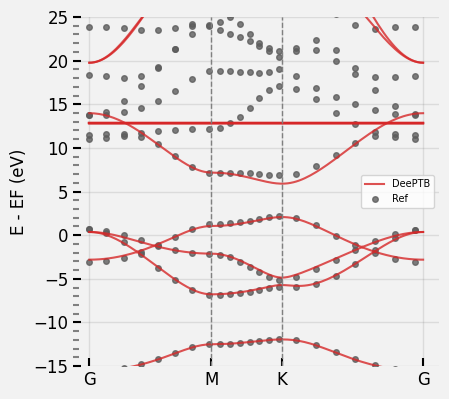

In [26]:

model = build_model(checkpoint="./dfenv/checkpoint/mix.best.pth")
jdata = j_loader("./run/band.json")
results_path = "./band_plot"
kpath_kwargs = jdata["task_options"]
stru_data = "./data/struct.vasp"
AtomicData_options = {"r_max": 5.5,"er_max": 3.5, "oer_max":1.6, "pbc": True}

bcal = Band(model=model, 
            use_gui=False, 
            results_path='./', 
            device=model.device)
bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs, 
               AtomicData_options=AtomicData_options)
bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = kpath_kwargs["E_fermi"],
               emin = -15,
               emax = 25)

In [2]:
from dptb.nn.dftbsk import DFTBSK
from ase.io import read
from dptb.data import AtomicData, AtomicDataDict
from dptb.utils.tools import j_loader
import torch
from dptb.postprocess.bandstructure.band import Band



In [3]:
sk_path = '/Users/aisiqg/Desktop/work/github/DeePTB/examples/slakos'
basis = {'B':['2s','2p'],"N":["2s","2p"]}
model = DFTBSK(basis=basis, skdata=sk_path,overlap=True)

In [12]:
common_options={
            "basis": {
                "B": ["2s", "2p"],
                "N": ["2s", "2p"]
            },
            "device": "cpu",
            "dtype": "float32",
            "overlap": True,
            "seed": 42
    }
model_options={
        "dftb": {
            "skdata":'/Users/aisiqg/Desktop/work/github/DeePTB/examples/slakos'
        }
    }
model = build_model(common_options=common_options, model_options=model_options)

399

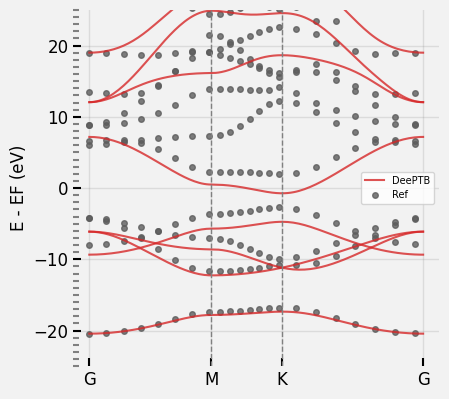

In [13]:
jdata = j_loader("./run/band.json")
results_path = "./band_plot"
kpath_kwargs = jdata["task_options"]
stru_data = "./data/struct.vasp"
AtomicData_options = {"r_max": 5.0, "oer_max":1.6, "pbc": True}
structase = read(stru_data)
#data = AtomicData.from_ase(structase, **AtomicData_options)
#data = AtomicData.to_AtomicDataDict(data)
#data = model.idp(data)
bcal = Band(model=model, 
            use_gui=False, 
            results_path=results_path, 
            device=model.device)
eigenstatus = bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs, 
               AtomicData_options=AtomicData_options)
bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = -2,
               emin = -25,
               emax = 25)

In [8]:
import numpy as np  
import matplotlib.pyplot as plt

In [9]:
ref_band = np.load(kpath_kwargs["ref_band"])[0]


(0.0, 0.6299321891494818)

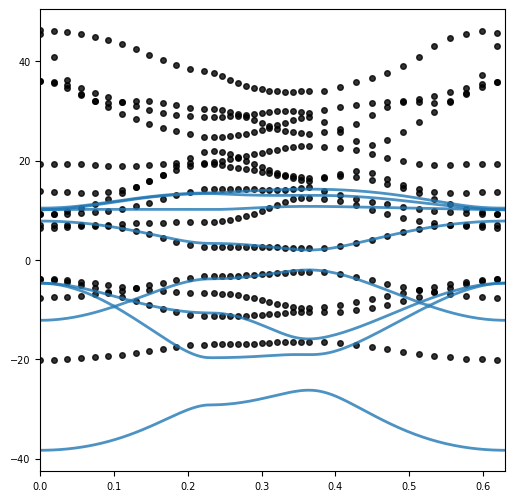

In [11]:
eigenstatus
nintp=4
EF1= (ref_band[:,3].max() + ref_band[:,4].min() )/2
eigs =eigenstatus["eigenvalues"]
EF2 = (eigs[:,3].max() + eigs[:,4].min() )/2
plt.figure(figsize=(6, 6))
xx = eigenstatus["xlist"]
plt.plot(eigenstatus["xlist"][::nintp], ref_band[::nintp]-EF1, 'ko', ms=4, alpha=0.8, label="Ref")
plt.plot(eigenstatus["xlist"], eigenstatus["eigenvalues"]-EF2, color="tab:blue", lw=2, alpha=0.8, label="DeePTB")
#plt.ylim(-22,16)
plt.xlim(xx.min(), xx.max())


In [8]:
from dptb.postprocess.bandstructure.band import Band
from dptb.nn.nnsk import NNSK
from dptb.utils.tools import j_loader
from dptb.nn.build import build_model
import os
from dptb.nn.dftbsk import DFTBSK
from dptb.nn.deeptb import MIX
from ase.io import read
from dptb.data import AtomicData, AtomicDataDict
import torch

In [13]:
model_options={
    "embedding":{
        "method": "se2",
        "rs": 2.5,
        "rc": 5.0,
        "n_axis":None,
        "radial_net": {
            "neurons": [10,20,30],
            "activation":"tanh",
            "if_batch_normalized":False
        }
    },
    "prediction":{
        "method": "sktb",
        "neurons": [16,16,16],
        "activation":"tanh",
        "if_batch_normalized":False
    },
    "dftbsk":
    {
        "skdata" :'/Users/aisiqg/Desktop/work/github/DeePTB/examples/slakos'

    }
}
common_options={
            "basis": {'B':['2s','2p'],"N":["2s","2p"]},
            "device": "cpu",
            "dtype": "float32",
            "overlap": True,
            "seed":0
            }

In [5]:
import torch

In [6]:
ckpt = torch.load('./dfenv/checkpoint/mix.iter500.pth')

In [10]:
ckpt['model_state_dict']

OrderedDict([('nnenv.embedding.descriptor.embedding_net.layers.0.layer.in_layer.weight',
              tensor([[ 0.3601,  0.3669, -0.1052,  0.4114, -0.1033],
                      [ 0.0666, -0.2389,  0.2854,  0.4175, -0.3495],
                      [ 0.4268,  0.0942,  0.2946,  0.0251,  0.2317],
                      [-0.0554,  0.3521,  0.0874, -0.1881,  0.1260],
                      [-0.2250, -0.0357, -0.1907,  0.2869, -0.3359],
                      [-0.2442, -0.1287, -0.2778,  0.0356, -0.4419],
                      [ 0.3691, -0.4101,  0.3151,  0.0456, -0.1756],
                      [ 0.2437,  0.0810,  0.3347,  0.0230, -0.1317],
                      [ 0.1517, -0.0919,  0.1930,  0.4084,  0.2884],
                      [-0.2208,  0.2531,  0.0654,  0.2138, -0.2791]])),
             ('nnenv.embedding.descriptor.embedding_net.layers.0.layer.in_layer.bias',
              tensor([-0.4446, -0.1655, -0.3568,  0.3890,  0.1329,  0.1752,  0.1065, -0.0113,
                       0.3825, -0.329